# Сбор данных

# Упражнение 1. Работа с API

Есть проект "Конструктор ОП" http://op.itmo.ru

## Задание 1.0

Доступ к контенту появляется после регистрации. Можно войти через ИСУ, первый вход = регистрация. Для целей лабораторной работы можно либо создать пользователя, либо воспользоваться тестовым.

В процессе работы нужно будет получить данные по API. Собрать по этим данным датасет (например, можно воспользоваться библиотекой pandas). После провести первичный анализ и сделать визуализации.

In [ ]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup as bs

In [ ]:
url = "https://op.itmo.ru/auth/token/login"
auth_data = {"username": "username", "password": "rifat-user-2001"}
token_txt = requests.post(url, auth_data).text
print(token_txt)

token = json.loads(token_txt)["auth_token"]
headers = {'Content-Type': "application/json", 'Authorization': "Token " + token}

## Задание 1.1 Получить идентификаторы всех учебных планов, имеющихся в op.itmo.ru

In [ ]:
urlT1_1 = 'https://op.itmo.ru/api/record/academic_plan/academic_wp_description/all'
urlT1_1_debug = 'http://op.itmo.ru/api/record/academic_plan/academic_wp_description/all?page=58'

In [ ]:
response = requests.get(urlT1_1, headers=headers)
response.status_code

200

In [ ]:
soupT1_1 = bs(response.text, "html.parser")
soupT1_1.text
# Вывод очень большой, поэтому ниже скопировал только часть данных из soupT1_1:
# {"count":589,"next":"http://op.itmo.ru/api/record/academic_plan/academic_wp_description/all?page=2",
# "previous":null,"results":[{"id":6796,"academic_plan_in_field_of_study":[{"id":6859,"ap_isu_id":10572,"year":2018,
# "title":"Нанофотоника и квантовая оптика"}],"wp_in_academic_plan":[{"id":2623,"discipline_code":"5546","title":"История","description":null,"status":"WK"},
# {"id":2625,"discipline_code":"5664" ...

In [ ]:
jsonT1_1 = json.loads(soupT1_1.text)

In [ ]:
def task1_1(link: str):
  ans = []
  stack = [link]
  c = 0

  while stack:
    curUrl = stack.pop()
    if curUrl is None:
      return ans

    response = ''
    try:
      response = requests.get(curUrl, headers=headers)
    except requests.exceptions.RequestException as e:
      print(curUrl)
      raise SystemExit(e)

    if response.status_code != 200:
      print('not 200')
      return ans

    curSoup = bs(response.text, 'html.parser')
    curJson = json.loads(curSoup.text)

    print('Step: ', c, '. ', curUrl)
    c += 1

    for key, val in curJson.items():
      if key == 'next':
        stack.append(val)
      if key == 'results':
        for i in val:
          ans.append(i['id'])

  return ans

In [ ]:
list_id = task1_1(urlT1_1)
print(len(list_id))

589


In [ ]:
j = 0
for i in range(0, len(list_id)+1, 19):
  if i <= len(list_id):
    print(list_id[j:i+1])
    j = i + 1
  else:
    print(list_id[j:len(list_id)])

[6796]
[6797, 6798, 6799, 6800, 6801, 6802, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813, 6814, 6815]
[6816, 6817, 6818, 6819, 6820, 6822, 6823, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837]
[6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846, 6847, 6849, 6852, 6853, 6854, 6855, 6856, 6857, 6858, 6860]
[6861, 6862, 6863, 6864, 6865, 6866, 6867, 6868, 6869, 6870, 6871, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879]
[6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895, 6898, 6899, 6900]
[6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6913, 6914, 6915, 6916, 6917, 6918, 6919]
[6921, 6922, 6923, 6924, 6925, 6926, 6927, 6930, 6931, 6932, 6933, 6934, 6935, 6936, 6937, 6938, 6939, 6940, 6941]
[6942, 6943, 6944, 6945, 6946, 6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960]
[6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 

## Задание 1.2 По этим планам получить детальное описание

In [ ]:
# https://op.itmo.ru/api/academicplan/detail/<id>

# пример вызова https://op.itmo.ru/api/academicplan/detail/7292

Структура ответа: 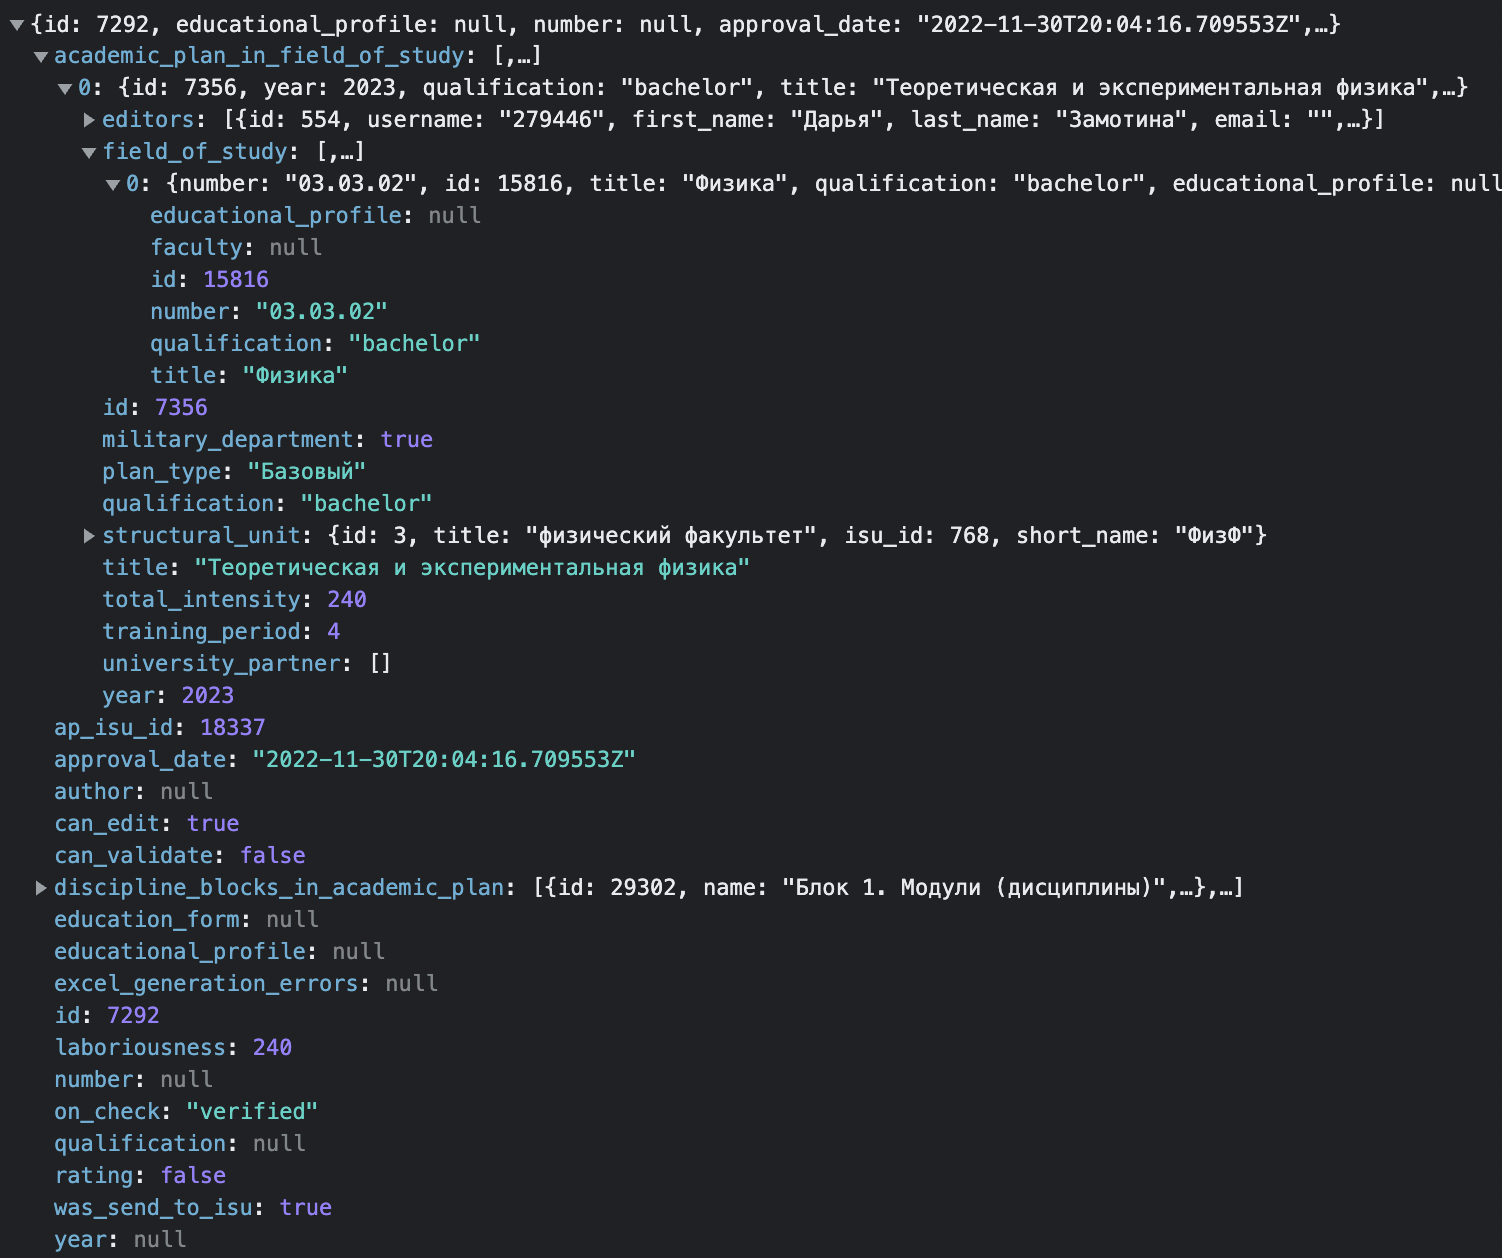

In [ ]:
def task1_2(list_ids):
  ans = []
  template = 'https://op.itmo.ru/api/academicplan/detail/'

  for curId in list_ids:
    curUrl = template + str(curId)

    curRes = ''
    try:
      curRes = requests.get(curUrl, headers=headers)
    except requests.exceptions.RequestException as e:
      print(curUrl)
      raise SystemExit(e)

    if curRes.status_code != 200:
      print('not 200')
      return

    curSoup = bs(curRes.text, 'html.parser')
    curJson = json.loads(curSoup.text)

    curYear = curJson['academic_plan_in_field_of_study'][0]['year']
    curQualifications = curJson['academic_plan_in_field_of_study'][0]['qualification']

    curStructural_unit = curJson['academic_plan_in_field_of_study'][0]['structural_unit']
    curWas_send_to_isu = curJson['was_send_to_isu']
    curOn_check = curJson['on_check']
    ans.append((curId, curYear, curQualifications, curStructural_unit, curWas_send_to_isu, curOn_check))

    print(curId, end='. ')

  return ans

In [ ]:
list_planInfo = task1_2(list_id)

In [ ]:
print(list_planInfo[500])

(7343, 2023, 'master', {'id': 17, 'title': 'факультет инфокоммуникационных технологий', 'isu_id': 725, 'short_name': 'ФИКТ'}, True, 'verified')


## Задание 1.3 Построить графики

Построить графики: количество планов по годам набора, квалификациям и структурным подразделениям.

In [ ]:
from collections import Counter
list_years = [v[1] for v in list_planInfo]

cntY = Counter(list_years)
cntY

Counter({2018: 44, 2021: 121, 2020: 134, 2019: 37, 2022: 125, 2023: 128})

In [ ]:
import matplotlib.pyplot as plt

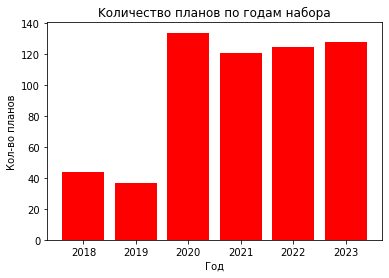

In [ ]:
plt.bar(list(cntY.keys()), list(cntY.values()), color = 'red')
plt.title('Kоличество планов по годам набора')
plt.xlabel('Год')
plt.ylabel('Кол-во планов')
plt.show()

In [ ]:
list_qualifications = [v[2] for v in list_planInfo]
cntQ = Counter(list_qualifications)
cntQ

Counter({'bachelor': 215, 'master': 367, 'specialist': 7})

In [ ]:
plt.bar(list(cntQ.keys()), list(cntQ.values()), color = 'red')
plt.title('Kоличество планов по квалификациям')
plt.xlabel('Квалификация')
plt.ylabel('Кол-во планов')
plt.show()

In [ ]:
list_units = []
for v in list_planInfo:
  if v[3] is not None:
    list_units.append(v[3]['short_name'])

cntU = Counter(list_units)
cntU

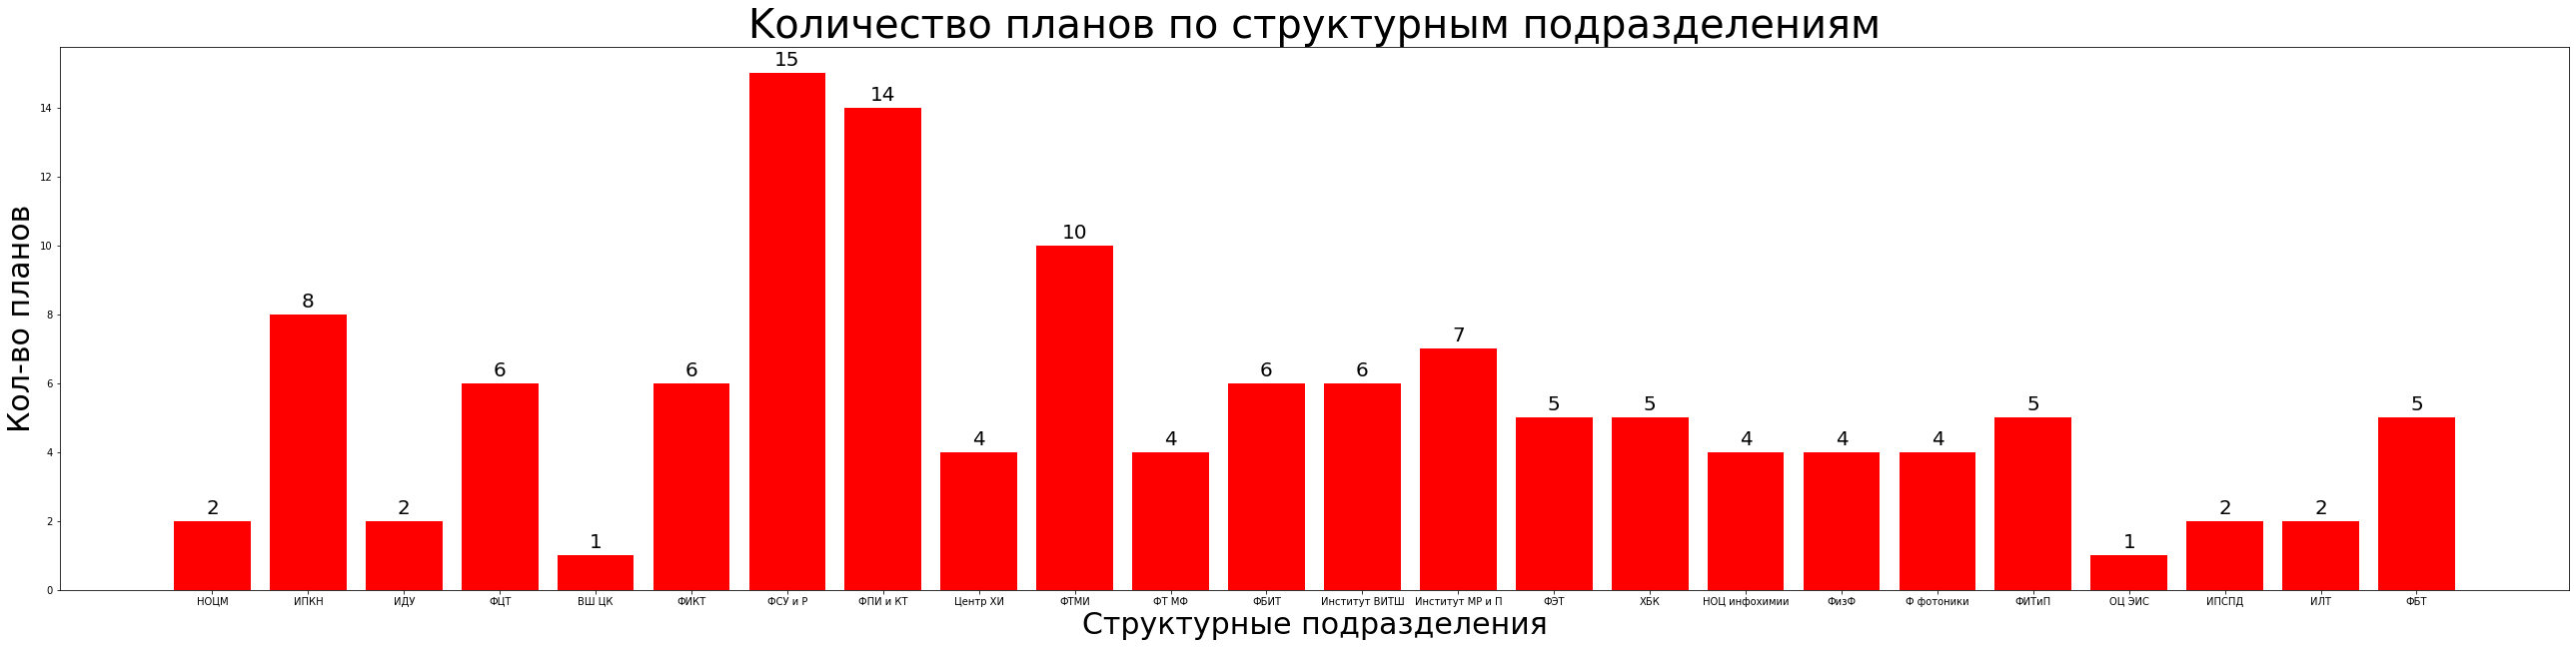

In [ ]:
y = list(cntU.values())
plt.figure(figsize=(45, 10))
plt.bar(list(cntU.keys()), y, color = 'red')
for i in range(len(y)):
        plt.text(i, y[i]+0.2, y[i], ha = 'center', fontsize = 20)
plt.title('Kоличество планов по структурным подразделениям', fontsize = 40)
plt.xlabel('Cтруктурные подразделения', fontsize = 30)
plt.ylabel('Кол-во планов', fontsize = 30)
plt.show()

## Задание 1.4 Анализ

Для планов 2023 года набора построить график с распределением статусов "on_check" и "was_send_to_isu". Вывести ID и название структурного подразделения для а) не принятых, б) не отправленных планов

In [ ]:
list_was_send_to_isu = []
for v in list_planInfo:
  if v[1] == 2023:
    list_was_send_to_isu.append(v[4])

cntW = Counter(list_was_send_to_isu)
cntW

Counter({True: 125, False: 3})

In [ ]:
x = list(map(str, cntW.keys()))
plt.bar(x, list(cntW.values()), color = 'red')
plt.title('График с распределением статусов "on_check"')
plt.xlabel('Статус "on_check"')
plt.ylabel('Кол-во планов')
plt.show()

In [ ]:
list_curOn_check = []
for v in list_planInfo:
  if v[1] == 2023:
    list_curOn_check.append(v[5])

cntC = Counter(list_curOn_check)
cntC

Counter({'verified': 125, 'in_work': 3})

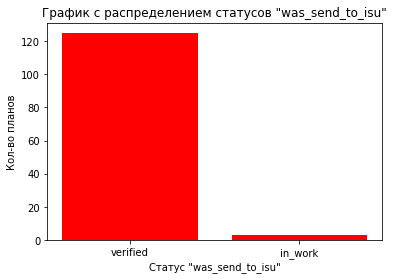

In [ ]:
plt.bar(list(cntC.keys()), list(cntC.values()), color = 'red')
plt.title('График с распределением статусов "was_send_to_isu"')
plt.xlabel('Статус "was_send_to_isu"')
plt.ylabel('Кол-во планов')
plt.show()

In [ ]:
for v in list_planInfo:
  if v[4] is False:
    if v[3] is not None:
      print('id: ', v[0], ' ', v[3]['title'])

id:  7402   факультет технологического менеджмента и инноваций
id:  7403   факультет технологического менеджмента и инноваций
id:  7484   факультет инфокоммуникационных технологий


In [ ]:
for v in list_planInfo:
  if v[5] != 'verified':
    if v[3] is not None:
      print('id: ', v[0], ' ', v[3]['title'])

id:  7402   факультет технологического менеджмента и инноваций
id:  7403   факультет технологического менеджмента и инноваций
id:  7484   факультет инфокоммуникационных технологий
